In [63]:
import torch
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="white")

In [86]:
def plot_certificate_grid(certificate_grid, ax, cbar_ax=None, vmax=1.0):
    df = pd.DataFrame(certificate_grid.mean(0))
    cmap = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
    cbar = False if cbar_ax is None else True
    sns.heatmap(df, vmin = 0.0, vmax=vmax, square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, cbar=cbar, cbar_ax=cbar_ax, ax=ax)
    ax.invert_yaxis()
    ax.set_xlabel('Inner')
    ax.set_ylabel('Intra')

In [73]:
dataset = 'synthetic'
certificates = torch.load(join('../output', dataset, 'certificates'))

p_is = np.arange(0.01, 0.1, 0.02)
p_js = np.arange(0.01, 0.1, 0.02)
vmax = max([x.mean(0).flatten().max() for x in certificates.values()])

In [74]:
gridspec_kw={'width_ratios': [4,]*len(p_is) + [0.5,]}
fig, ax = plt.subplots(len(p_is), len(p_js)+1, figsize=(len(p_js)*4+1, len(p_is)*4), gridspec_kw=gridspec_kw)

for i, p_i in enumerate(p_is):
    for j, p_j in enumerate(p_js):
        alpha_pair = (p_i, p_j)
        certificate_grid = certificates[alpha_pair]

        # put color bar in the final axis
        if j == len(p_js) - 1:
            cbar_ax=ax[i][-1]
        else:
            cbar_ax=None

        plot_certificate_grid(certificate_grid, ax[i, j], cbar_ax=cbar_ax, vmax)

        # title if on the top row of first column
        if i == 0:
            ax[i, j].set_title(fr'$p_i$ = {round(alpha_pair[0], 2)}, $p_o$ = {round(alpha_pair[1], 2)}')
fig

KeyError: (0.01, 0.049999999999999996)

In [87]:
dataset = 'hiv'
certificates = torch.load(join('../output', dataset, 'certificates'))

p_is = np.arange(0.01, 0.1, 0.02)
p_js = np.arange(0.01, 0.1, 0.02)
vmax = max([x.mean(0).flatten().max() for x in certificates.values()])

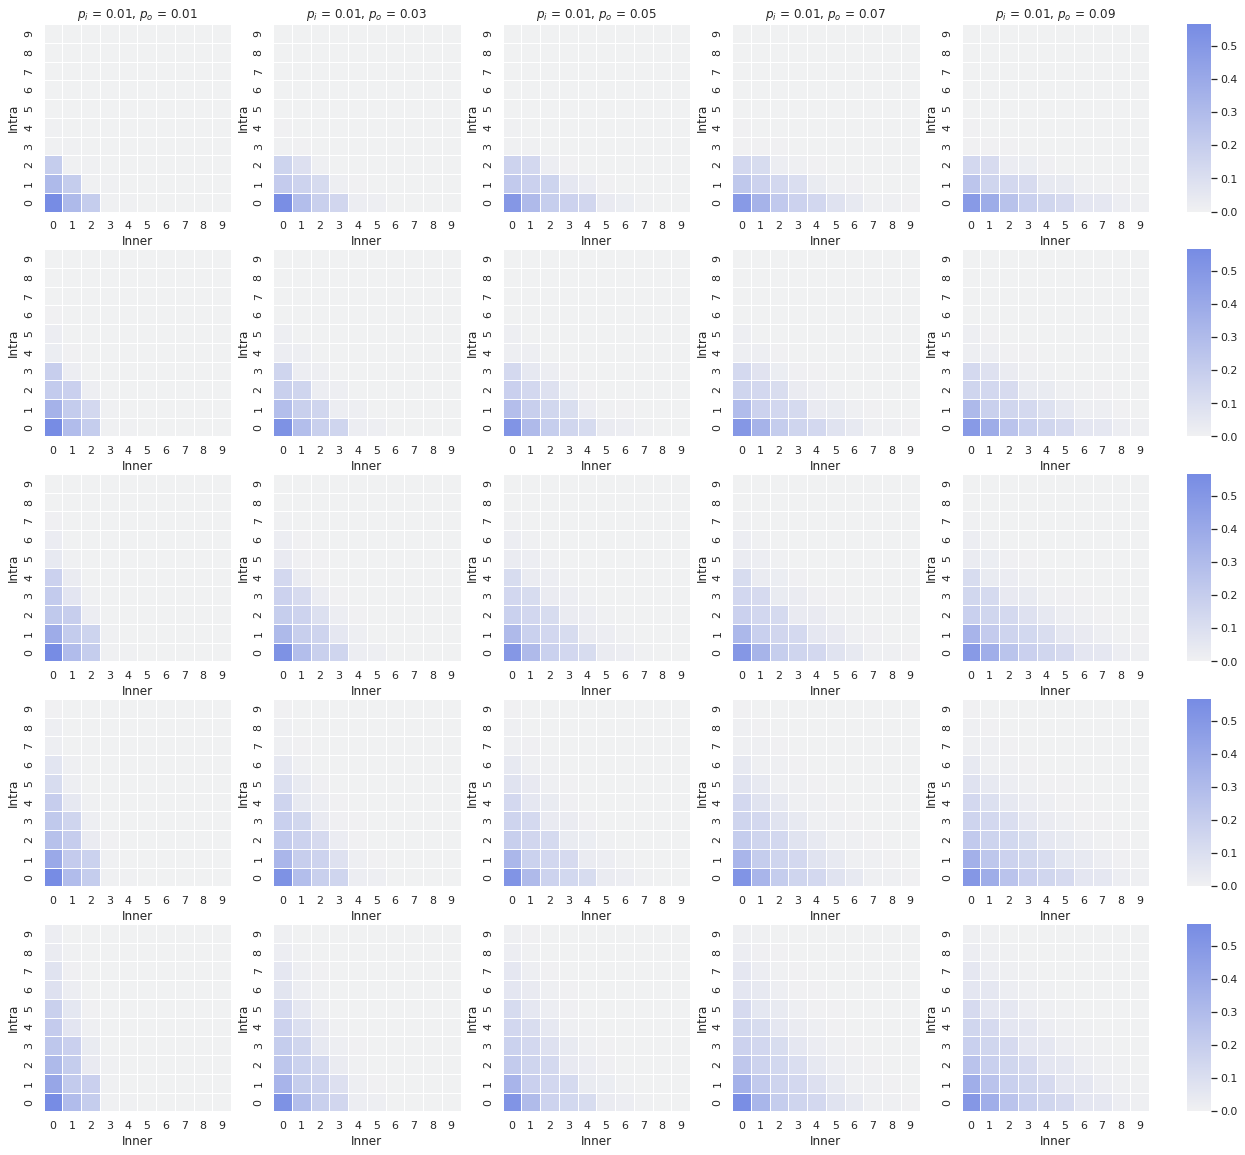

In [89]:
gridspec_kw={'width_ratios': [4,]*len(p_is) + [0.5,]}
fig, ax = plt.subplots(len(p_is), len(p_js)+1, figsize=(len(p_js)*4+1, len(p_is)*4), gridspec_kw=gridspec_kw)

for i, p_i in enumerate(p_is):
    for j, p_j in enumerate(p_js):
        alpha_pair = (p_i, p_j)
        certificate_grid = certificates[alpha_pair]

        # put color bar in the final axis
        if j == len(p_js) - 1:
            cbar_ax=ax[i][-1]
        else:
            cbar_ax=None

        plot_certificate_grid(certificate_grid, ax[i, j], cbar_ax=cbar_ax, vmax=vmax)

        # title if on the top row of first column
        if i == 0:
            ax[i, j].set_title(fr'$p_i$ = {round(alpha_pair[0], 2)}, $p_o$ = {round(alpha_pair[1], 2)}')
fig